In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import fastf1
import fastf1.plotting

In [74]:
bahrain_race = fastf1.get_session(2023, 1, "R")
bahrain_race.load(telemetry=True, laps=True, weather=True)

saudi_race = fastf1.get_session(2023, 2, "R")
saudi_race.load(telemetry=True, laps=True, weather=True)

australia_race = fastf1.get_session(2023, 3, "R")
australia_race.load(telemetry=True, laps=True, weather=True)

azerbaijan_race = fastf1.get_session(2023, 4, "R")
azerbaijan_race.load(telemetry=True, laps=True, weather=True)

miami_race = fastf1.get_session(2023, 5, "R")
miami_race.load(telemetry=True, laps=True, weather=True)

monaco_race = fastf1.get_session(2023, 6, "R")
monaco_race.load(telemetry=True, laps=True, weather=True)

spain_race = fastf1.get_session(2023, 7, "R")
spain_race.load(telemetry=True, laps=True, weather=True)

canada_race = fastf1.get_session(2023, 8, "R")
canada_race.load(telemetry=True, laps=True, weather=True)

austria_race = fastf1.get_session(2023, 9, "R")
austria_race.load(telemetry=True, laps=True, weather=True)


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for drive

In [76]:
bahrain_quali = fastf1.get_session(2023, 1, "Q")
bahrain_quali.load(telemetry=True, laps=True, weather=True)

saudi_quali = fastf1.get_session(2023, 2, "Q")
saudi_quali.load(telemetry=True, laps=True, weather=True)

australia_quali = fastf1.get_session(2023, 3, "Q")
australia_quali.load(telemetry=True, laps=True, weather=True)

azerbaijan_quali = fastf1.get_session(2023, 4, "Q")
azerbaijan_quali.load(telemetry=True, laps=True, weather=True)

miami_quali = fastf1.get_session(2023, 5, "Q")
miami_quali.load(telemetry=True, laps=True, weather=True)

monaco_quali = fastf1.get_session(2023, 6, "Q")
monaco_quali.load(telemetry=True, laps=True, weather=True)

spain_quali = fastf1.get_session(2023, 7, "Q")
spain_quali.load(telemetry=True, laps=True, weather=True)

canada_quali = fastf1.get_session(2023, 8, "Q")
canada_quali.load(telemetry=True, laps=True, weather=True)

austria_quali = fastf1.get_session(2023, 9, "Q")
austria_quali.load(telemetry=True, laps=True, weather=True)

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached 

the following code generates the plot of finishing position of each driver for each race

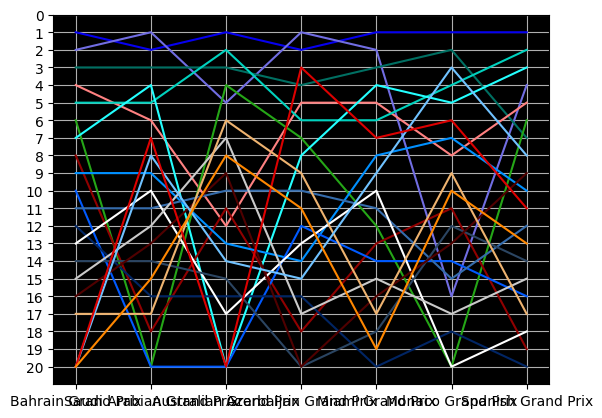

In [174]:
races = [bahrain_race, saudi_race, australia_race, azerbaijan_race, miami_race, monaco_race, spain_race]
race_results = [[None for i in range(len(races))]]
race_datas = [None for i in range(len(races))]

for i in range(len(races)):
    race_data = {
        "Name": races[i].results["FullName"],
        "GridPosition": races[i].results["GridPosition"],
        "ClassifiedPosition": races[i].results["ClassifiedPosition"],
        "TeamId": races[i].results["TeamId"]
    }

    df = pd.DataFrame(race_data)
    race_datas[i] = df
    
race_results = pd.DataFrame()
race_results_driver = pd.DataFrame()


for i in range(len(races)):
    EventName = races[i].event.EventName
    race_results[EventName] = race_datas[i]["ClassifiedPosition"]
    race_results_driver[EventName] = race_datas[i]["Name"]

race_results = race_results.replace(["R"], ["20"])
race_results = race_results.apply(pd.to_numeric)
ax = plt.axes()

for i in range(len(race_results)):
    color = fastf1.plotting.driver_color(race_results_driver["Bahrain Grand Prix"].str.lower().iloc[i])
    plt.plot(race_results.columns, race_results.iloc[i], color=color)
        
plt.ylim(21, 0)
plt.grid()
plt.yticks(np.arange(21))
ax.set_facecolor("black")
plt.show()

the following code generates the plot of starting grid of each driver for each race

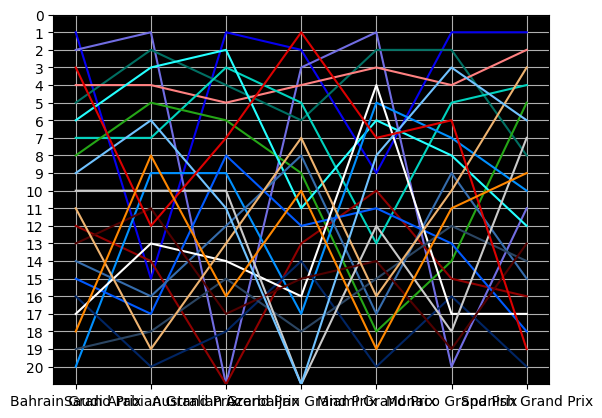

In [172]:
races = [bahrain_race, saudi_race, australia_race, azerbaijan_race, miami_race, monaco_race, spain_race]

race_results = [[None for i in range(len(races))]]

race_datas = [None for i in range(len(races))]

for i in range(len(races)):
    race_data = {
        "Name": races[i].results["FullName"],
        "GridPosition": races[i].results["GridPosition"],
        "ClassifiedPosition": races[i].results["ClassifiedPosition"],
        "TeamId": races[i].results["TeamId"]
    }

    df = pd.DataFrame(race_data)
    race_datas[i] = df

race_starting_grid = pd.DataFrame()
race_starting_grid_driver = pd.DataFrame()

for i in range(len(races)):
    EventName = races[i].event.EventName
    race_starting_grid[EventName] = race_datas[i]["GridPosition"]

    race_starting_grid_driver[EventName] = race_datas[i]["Name"]

race_starting_grid = race_starting_grid.replace(0.0, 21.0)
ax = plt.axes()

for i in range(len(race_starting_grid)):
    color = fastf1.plotting.driver_color(race_starting_grid_driver["Bahrain Grand Prix"].str.lower().iloc[i])
    plt.plot(race_starting_grid.columns, race_starting_grid.iloc[i], color=color)
    
plt.ylim(21, 0)
plt.grid()
plt.yticks(np.arange(21))
ax.set_facecolor("black")
plt.show()


the following code generates the plot of qualifying result for each driver for each race

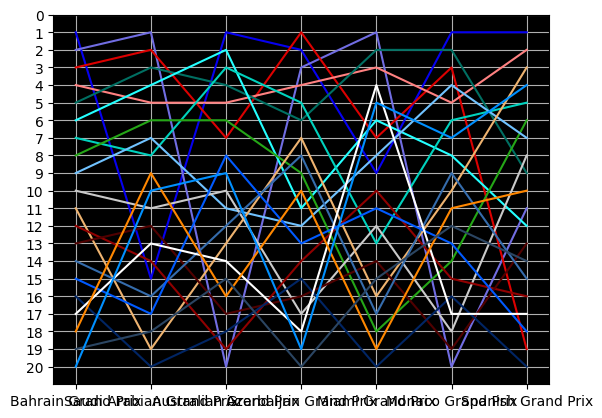

In [175]:
qualis = [bahrain_quali, saudi_quali, australia_quali, azerbaijan_quali, miami_quali, monaco_quali, spain_quali]
quali_results = [[None for i in range(len(qualis))]]
quali_datas = [None for i in range(len(qualis))]

for i in range(len(races)):
    quali_data = {
        "Name": qualis[i].results["FullName"],
        "Position": qualis[i].results["Position"],
        "TeamId": qualis[i].results["TeamId"]
    }

    df1 = pd.DataFrame(quali_data)
    quali_datas[i] = df1

race_results = pd.DataFrame()
race_results_driver = pd.DataFrame()

race_starting_grid = pd.DataFrame()
race_starting_grid_driver = pd.DataFrame()

quali_results = pd.DataFrame()
quali_results_driver = pd.DataFrame()

for i in range(len(races)):
    EventName = races[i].event.EventName
    quali_results[EventName] = quali_datas[i]["Position"]

    quali_results_driver[EventName] = quali_datas[i]["Name"]

ax = plt.axes()
for i in range(len(quali_results)):
    color = fastf1.plotting.driver_color(quali_results_driver["Bahrain Grand Prix"].str.lower().iloc[i])
    plt.plot(quali_results.columns, quali_results.iloc[i], color=color)

plt.ylim(21, 0)
plt.grid()
plt.yticks(np.arange(21))
ax.set_facecolor("black")
plt.show()

In [116]:
for i in range(len(races)):
    race_data = {
        "Name": races[i].results["FullName"],
        "GridPosition": races[i].results["GridPosition"],
        "ClassifiedPosition": races[i].results["ClassifiedPosition"],
        "TeamId": races[i].results["TeamId"]
    }

    quali_data = {
        "Name": qualis[i].results["FullName"],
        "Position": qualis[i].results["Position"],
        "TeamId": qualis[i].results["TeamId"]
    }

    df = pd.DataFrame(race_data)
    df1 = pd.DataFrame(quali_data)
    race_datas[i] = df
    quali_datas[i] = df1

In [138]:
race_results = pd.DataFrame()
race_results_driver = pd.DataFrame()

race_starting_grid = pd.DataFrame()
race_starting_grid_driver = pd.DataFrame()

quali_results = pd.DataFrame()
quali_results_driver = pd.DataFrame()

for i in range(len(races)):
    EventName = races[i].event.EventName
    race_results[EventName] = race_datas[i]["ClassifiedPosition"]
    race_starting_grid[EventName] = race_datas[i]["GridPosition"]
    quali_results[EventName] = quali_datas[i]["Position"]

    race_results_driver[EventName] = race_datas[i]["Name"]
    race_starting_grid_driver[EventName] = race_datas[i]["Name"]
    quali_results_driver[EventName] = quali_datas[i]["Name"]